In [1]:
#%cd C:/Users/Mathieu/Desktop/Projets/Benter
%cd /home/mathieu/Prose/Mathieu/Benter-Project

/home/mathieu/Prose/Mathieu/Benter-Project


In [2]:
# comapre old with current featured data
%matplotlib inline
    
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns

from utils import import_data
from utils import preprocess
from constants import Sources

sns.set(style="ticks", context="talk")

source= Sources.UNIBET

In [3]:
race_horse_df = import_data.load_featured_data(source=source)
x = preprocess.preprocess(race_horse_df=race_horse_df, source=source)

/home/mathieu/Prose/Mathieu/Benter-Project/utils/preprocess.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df["rope_n"] = features_df["rope_n"] / features_df["n_horses"]
/home/mathieu/Prose/Mathieu/Benter-Project/utils/preprocess.py:356: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ) / features_df["rope_n"].std()
/home/mathieu/Prose/Mathieu/Benter-Project/utils/preprocess.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [6]:
race_horse_df.columns

Index(['runner_id', 'horse_id', 'race_id', 'race_date', 'race_datetime',
       'music', 'odds', 'horse_place', 'weight', 'rope_n', 'blinkers', 'shoes',
       'horse_stakes', 'sex', 'age', 'is_in_team', 'coat', 'race_distance',
       'race_stake', 'race_type', 'n_horse_previous_races',
       'n_horse_previous_positions', 'average_horse_position',
       'average_horse_top_1_x', 'average_horse_top_3', 'jockey_id',
       'n_jockey_previous_races', 'n_jockey_previous_positions',
       'average_jockey_position', 'average_jockey_top_1',
       'average_jockey_top_3', 'trainer_id', 'n_trainer_previous_races',
       'n_trainer_previous_positions', 'average_trainer_position',
       'average_trainer_top_1', 'average_trainer_top_3', 'owner_id',
       'n_owner_previous_races', 'n_owner_previous_positions',
       'average_owner_position', 'average_owner_top_1', 'average_owner_top_3',
       'horse_show_ground', 'race_track_country', 'n_horses',
       'mean_horse_place', 'average_horse_to

In [8]:
col = 'placeCorde' if source == Sources.PMU else 'rope_n'
race_df=race_horse_df.groupby('race_id')[col].agg('mean').to_frame()

In [9]:
race_df['n_horses']=race_horse_df.groupby('race_id')['n_horses'].agg('first')

<AxesSubplot:>

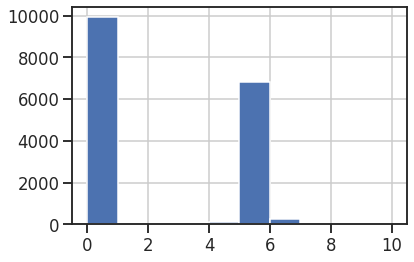

In [14]:
race_df[race_df['n_horses']==10][col].hist(bins=10)

In [17]:
race_horse_df['coat']

0             BROWN
1               BAY
2      PANGARE_NOIR
3               BAY
4               BAY
           ...     
995             BAY
996             BAY
997         UNKNOWN
998         UNKNOWN
999           BLACK
Name: coat, Length: 2839238, dtype: object

In [43]:
race_horse_df['indicateurInedit'].value_counts(dropna=False)

False    1414069
True       45270
Name: indicateurInedit, dtype: int64

In [45]:
race_horse_df['horse_sex'].value_counts(dropna=False)

HONGRES     651433
FEMELLES    557856
MALES       250050
Name: horse_sex, dtype: int64

In [37]:
race_horse_df['course_track_type'].value_counts(dropna=False)

NaN           1202002
HERBE          153335
GAZON           91070
POUZZOLANE       9987
SABLE            2907
DIRT               38
Name: course_track_type, dtype: int64

In [36]:
race_horse_df['course_condition_age'].value_counts(dropna=False)

NaN                      849412
TROIS_ANS                148696
QUATRE_ANS_ET_PLUS       137884
TROIS_ANS_ET_PLUS        102474
CINQ_ANS_ET_PLUS          73196
QUATRE_ANS                64055
DEUX_ANS                  45802
DEUX_ANS_ET_PLUS          12516
CINQ_ANS                   8871
QUATRE_CINQ_ANS            8707
SIX_ANS_ET_PLUS            3038
CINQ_SIX_ANS               2028
DEUX_ET_TROIS_ANS           977
TROIS_QUATRE_CINQ_ANS       807
INCONNU                     366
QUATE_CINQ_SIX_ANS          332
SIX_ANS                     125
DEUX_TROIS_QUATRE_ANS        53
Name: course_condition_age, dtype: int64

In [27]:
race_horse_df['course_condition_sexe'].value_counts(dropna=False)

TOUS_CHEVAUX           1064272
FEMELLES                215079
MALES_ET_HONGRES        166432
FEMELLES_ET_MALES         8528
MALES                     4944
FEMELLES_ET_HONGRES         70
HONGRES                     14
Name: course_condition_sexe, dtype: int64

In [29]:
race_horse_df['poidsConditionMonte'].value_counts(dropna=False)

NaN      1340526
545.0       6488
565.0       6353
555.0       6278
640.0       6244
          ...   
57.0           1
632.0          1
633.0          1
55.0           1
511.0          1
Name: poidsConditionMonte, Length: 151, dtype: int64

In [35]:
race_horse_df['handicap_value'].value_counts(dropna=False)

NaN     1178113
31.0       7085
28.0       6676
30.0       6576
29.0       6477
         ...   
2.0           5
82.5          3
86.0          3
78.5          3
81.5          1
Name: handicap_value, Length: 167, dtype: int64

In [32]:
race_horse_df['blinkers'].value_counts(dropna=False)

SANS_OEILLERES             1165444
NaN                         154930
OEILLERES_CLASSIQUE          77370
OEILLERES_AUSTRALIENNES      61595
Name: blinkers, dtype: int64

In [33]:
race_horse_df['ecurie'].value_counts(dropna=False)

NaN    1395724
A        53442
B         8796
C         1063
0          184
D          116
E           13
0.0          1
Name: ecurie, dtype: int64

In [34]:
race_horse_df['unshod'].value_counts(dropna=False)

NaN                               1174348
DEFERRE_ANTERIEURS_POSTERIEURS     174584
DEFERRE_POSTERIEURS                 75685
DEFERRE_ANTERIEURS                  34267
REFERRE_ANTERIEURS_POSTERIEURS        455
Name: unshod, dtype: int64

In [23]:
race_horse_df['course_distance_unit'].value_counts(dropna=False)

METRE    1459339
Name: course_distance_unit, dtype: int64

In [22]:
race_horse_df['allure'].value_counts(dropna=False)

TROT     849368
GALOP    609971
Name: allure, dtype: int64

In [21]:
race_horse_df['course_corde'].value_counts(dropna=False)

CORDE_GAUCHE    670257
CORDE_DROITE    581389
NaN             207693
Name: course_corde, dtype: int64

In [25]:
race_horse_df['course_discipline'].value_counts(dropna=False)

ATTELE          736872
PLAT            495516
MONTE           112496
HAIE             67527
STEEPLECHASE     40776
CROSS             6152
Name: course_discipline, dtype: int64

In [26]:
race_horse_df['course_specialite'].value_counts(dropna=False)

TROT_ATTELE    736872
PLAT           495516
OBSTACLE       114455
TROT_MONTE     112496
Name: course_specialite, dtype: int64

In [19]:
race_horse_df['handicap_weight'].sample(10)

1448688      NaN
394225       NaN
835251       NaN
317891     600.0
1277615    550.0
1059874    580.0
337637       NaN
366851       NaN
333375     555.0
942867     520.0
Name: handicap_weight, dtype: float64

### Extract features

DONE v1

    win rate horse, jockey, trainer
    mean place horse, jockey, trainer
    horse_age, horse_sex
    horse race
    pregnant
    breeder
    unshod
    corde
    parcours
    blinker
    handicap
    gains en cours, carrière, année précédente, 
    enjeu de la course (pool prize, winner prize)
    weight, actual weights
    driver
    race_type
    état du sol (type sol, penetrometre)
    duration since last race -> performance.json (remaining to compute timedelta between last_race and date)
    

TODO

    ecuries
From programme

    numéro course jockey dans la journée
    nombre de course courus par le jockey dans la journée
    
From past races

    expérience: nombre de course du cheval/horse/trainer dans l'historique
    inédit pour cheval (or in partipants), jockey,trainer
    new race type for horse, jockey, trainer
    number of days since last race (horse  from perforamnce.json)
    last race position    
    previous horse speed
    mean speed (bins?)
    max speed (bins?)
    elo ranking horse, jockey, trainer (from historic)
    max elo ranking father/mother/father_mother
    track draw advatage from historic 
    already race together horse+driver
    
directly in course

    
in participants
    



In [17]:
race_horse_df['age'].value_counts()

4     347731
3     290980
5     262594
6     187223
7     138325
8      93448
2      53517
9      52931
10     22012
11      6645
12      2640
13       955
14       277
15        46
0          8
1          4
16         2
60         1
Name: age, dtype: int64

In [27]:
race_horse_df.horse_sex.value_counts()

HONGRES     651433
FEMELLES    557856
MALES       250050
Name: horse_sex, dtype: int64

In [38]:
race_horse_df.gainsCarriere.apply(np.log)

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
1459334    11.287279
1459335    10.745055
1459336    11.985426
1459337    11.935575
1459338    10.742897
Name: gainsCarriere, Length: 1459339, dtype: float64

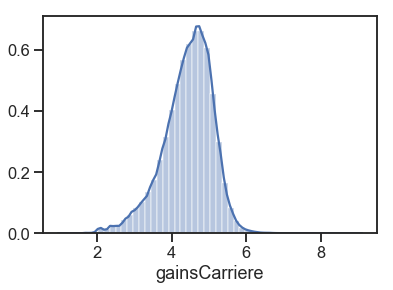

In [42]:
sns.distplot((race_horse_df.gainsCarriere/100).apply(np.log10).replace([np.inf, -np.inf], np.nan));

In [44]:
(race_horse_df.gainsCarriere==0).mean()

0.07424525761320708

In [41]:
race_horse_df.gainsCarriere.isna().mean()

0.15526961178999532